# Importing Libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE


# Data Acquisition

In [4]:
# Reading data from CSV files
df = pd.read_csv("Absenteeism_at_work.csv", sep=';') 
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [7]:
# Formatting columns names to replace spaces with underscore for easier reference
df.columns = df.columns.str.strip().str.lower().str.replace(" ","_")

In [8]:
# Displaying the central tendancies for the data
df.describe(include='all')

,id,reason_for_absence,month_of_absence,day_of_the_week,seasons,transportation_expense,distance_from_residence_to_work,service_time,age,work_load_average/day,...,disciplinary_failure,education,son,social_drinker,social_smoker,pet,weight,height,body_mass_index,absenteeism_time_in_hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [9]:
# checking for null values
df.isna().sum()

id                                 0
reason_for_absence                 0
month_of_absence                   0
day_of_the_week                    0
seasons                            0
transportation_expense             0
distance_from_residence_to_work    0
service_time                       0
age                                0
work_load_average/day              0
hit_target                         0
disciplinary_failure               0
education                          0
son                                0
social_drinker                     0
social_smoker                      0
pet                                0
weight                             0
height                             0
body_mass_index                    0
absenteeism_time_in_hours          0
dtype: int64

# Outlire - Boxplot

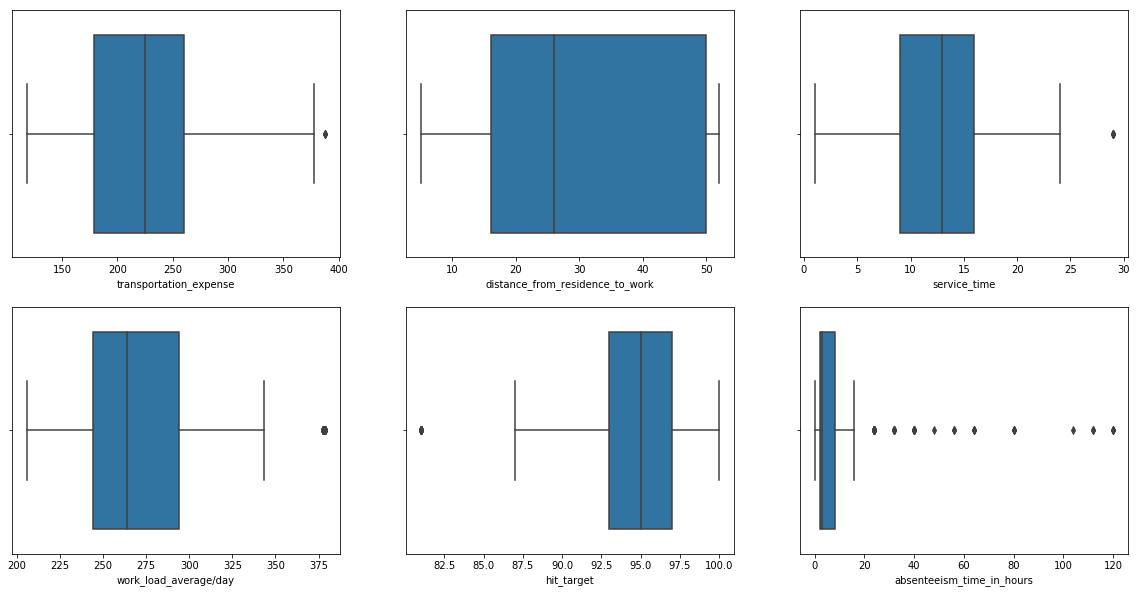

In [10]:
fig, axes = plt.subplots(2, 3)
fig.set_figheight(10)
fig.set_figwidth(20)

sns.boxplot(x='transportation_expense', data=df, ax=axes[0][0])
sns.boxplot(x='distance_from_residence_to_work', data=df, ax=axes[0][1])
sns.boxplot(x='service_time', data=df, ax=axes[0][2])
sns.boxplot(x='work_load_average/day', data=df, ax=axes[1][0])
sns.boxplot(x='hit_target', data=df, ax=axes[1][1])
sns.boxplot(x='absenteeism_time_in_hours', data=df, ax=axes[1][2])

# Data Processing to remove outlire

In [12]:
# As per the identifications in above box plot, outliers have been idenfied and dropping with below conditions.
# 1) absenteeism_time_in_hours => 24
# 2) work_load_average/day > 350
# 3) hit_target < 85
# 4) transportation_expense > 380
# 5) service_time > 25

df = df.drop(index = df[df.absenteeism_time_in_hours >= 24].index).reset_index(drop=True)
df = df.drop(index = df[df['work_load_average/day'] > 350].index).reset_index(drop=True)
df = df.drop(index = df[df.hit_target < 85].index).reset_index(drop=True)
df = df.drop(index = df[df.transportation_expense > 380].index).reset_index(drop=True)
df = df.drop(index = df[df.service_time > 25].index).reset_index(drop=True)

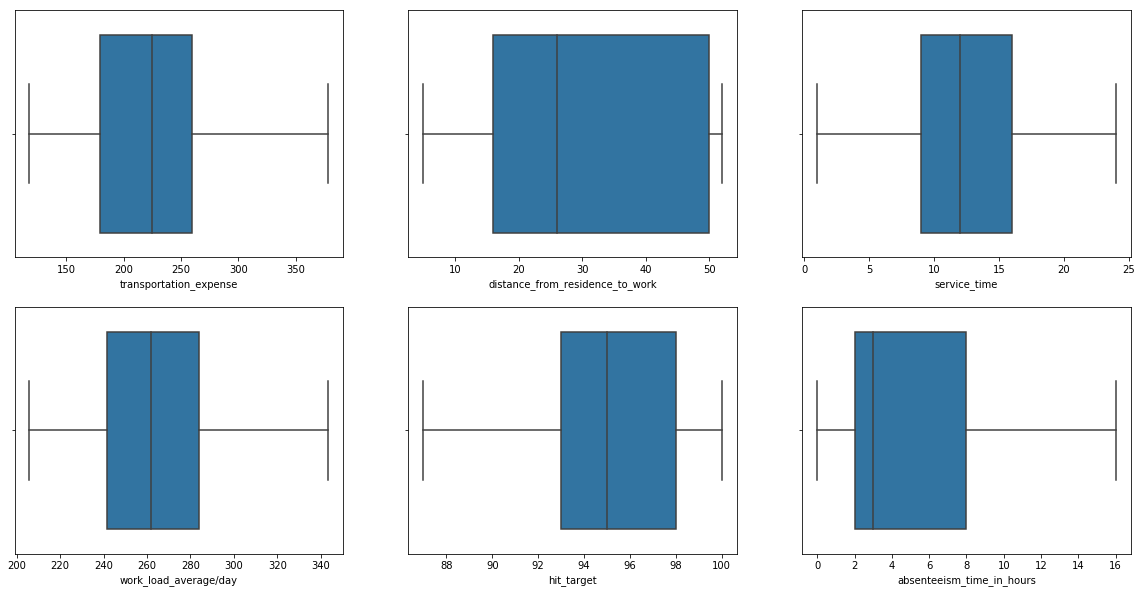

In [13]:
fig, axes = plt.subplots(2, 3)
fig.set_figheight(10)
fig.set_figwidth(20)

sns.boxplot(x='transportation_expense', data=df, ax=axes[0][0])
sns.boxplot(x='distance_from_residence_to_work', data=df, ax=axes[0][1])
sns.boxplot(x='service_time', data=df, ax=axes[0][2])
sns.boxplot(x='work_load_average/day', data=df, ax=axes[1][0])
sns.boxplot(x='hit_target', data=df, ax=axes[1][1])
sns.boxplot(x='absenteeism_time_in_hours', data=df, ax=axes[1][2])


In [14]:
# Check dataset
df.shape

(646, 21)

# Data visualization with bar graph

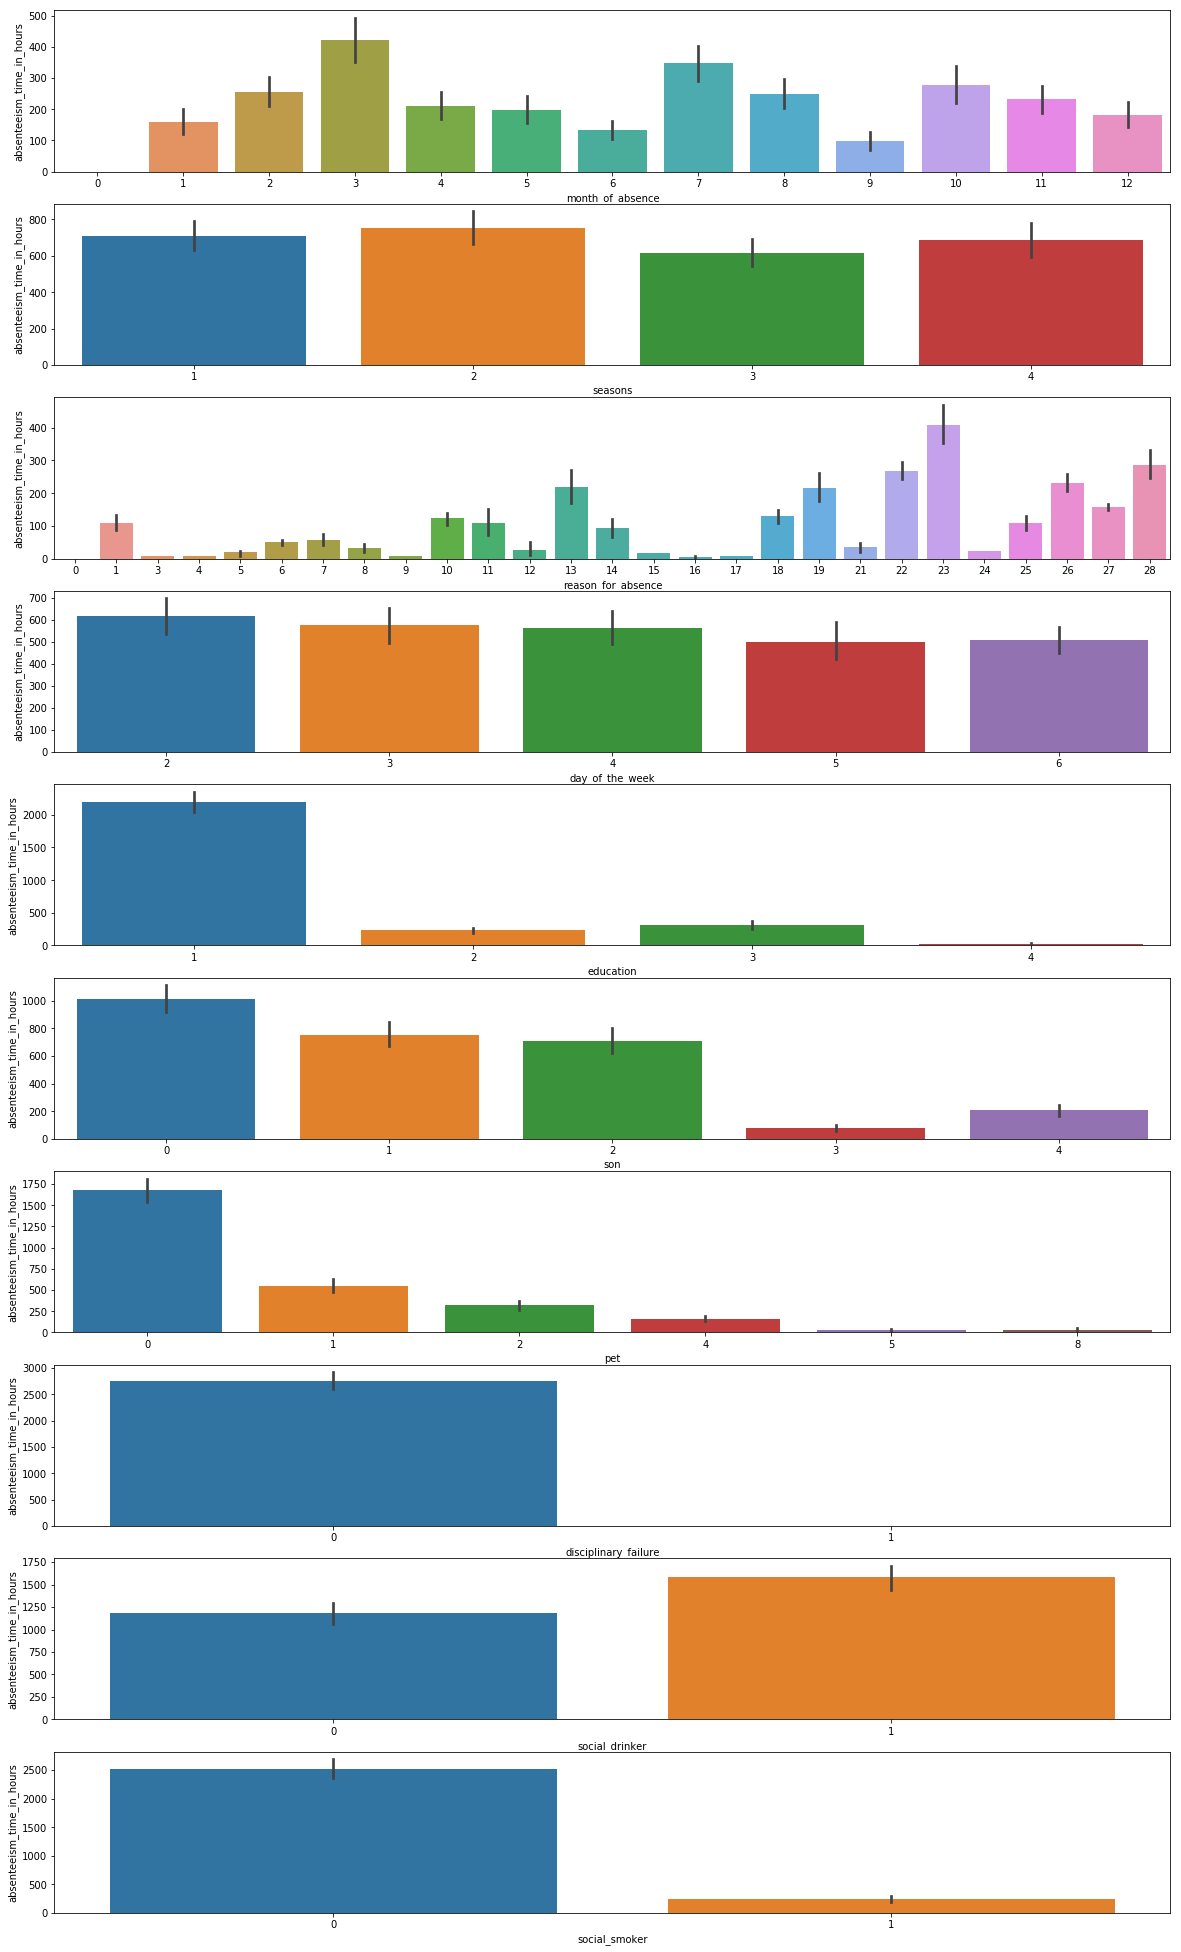

In [19]:
fig, axes = plt.subplots(10, 1)
fig.set_figheight(35)
fig.set_figwidth(20)

# For categorical columns
sns.barplot(x='month_of_absence',y='absenteeism_time_in_hours',data=df,estimator=np.sum, ax=axes[0])
sns.barplot(x='seasons',y='absenteeism_time_in_hours',data=df,estimator=np.sum,ax=axes[1])
sns.barplot(x='reason_for_absence',y='absenteeism_time_in_hours',data=df,estimator=np.sum,ax=axes[2])
sns.barplot(x='day_of_the_week',y='absenteeism_time_in_hours',data=df,estimator=np.sum, ax=axes[3])
sns.barplot(x='education',y='absenteeism_time_in_hours',data=df,estimator=np.sum,ax=axes[4])
sns.barplot(x='son',y='absenteeism_time_in_hours',data=df,estimator=np.sum,ax=axes[5])
sns.barplot(x='pet',y='absenteeism_time_in_hours',data=df,estimator=np.sum,ax=axes[6])

# For boolean columns
sns.barplot(x='disciplinary_failure',y='absenteeism_time_in_hours',data=df,estimator=np.sum,ax=axes[7])
sns.barplot(x='social_drinker',y='absenteeism_time_in_hours',data=df,estimator=np.sum,ax=axes[8])
sns.barplot(x='social_smoker',y='absenteeism_time_in_hours',data=df,estimator=np.sum,ax=axes[9])

<h1>Data Preprocessing</h1>

In [6]:
# As the absenteen hour cannot be more than 24 per day thefore removing
# The records where hour is more than 24
df = df.drop(df[df.absenteeism_time_in_hours > 24].index).reset_index(drop = True)

In [7]:
# As the data set have months till 12 therefore month 0 is invalid
# Therefore removing records for month 0
df = df.drop(df[df.month_of_absence == 0].index).reset_index(drop = True)

In [8]:
# There is no feature in the dataset which can clearly identify duplicate therefore commenting
# df = df.drop(df[df.duplicated(subset=None, keep='first')].index).reset_index(drop = True)


In [9]:
# As the dataset has a derived attribute BMI which depends on person's height and weight therefore
# We can remove the attributes height and weight
df = df.drop(['weight', 'height'], axis=1)

In [10]:
# As the data contains categorical feature due to which if wee perform the analysis directly it will be of no use
# And therefore we are performing binary encoding on the categorical columns

# For reason for seasons
df = pd.get_dummies(df, columns=['seasons'], prefix = ['season'])

# For reason_for_absence
df = pd.get_dummies(df, columns=['reason_for_absence'], prefix = ['reason_for_absence'])

# month_of_absence
df = pd.get_dummies(df, columns=['month_of_absence'], prefix = ['month_of_absence'])

# day_of_the_week
df = pd.get_dummies(df, columns=['day_of_the_week'], prefix = ['day_of_the_week'])


df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 709 entries, 0 to 708
Data columns (total 64 columns):
id                                 709 non-null int64
transportation_expense             709 non-null int64
distance_from_residence_to_work    709 non-null int64
service_time                       709 non-null int64
age                                709 non-null int64
work_load_average/day              709 non-null float64
hit_target                         709 non-null int64
disciplinary_failure               709 non-null int64
education                          709 non-null int64
son                                709 non-null int64
social_drinker                     709 non-null int64
social_smoker                      709 non-null int64
pet                                709 non-null int64
body_mass_index                    709 non-null int64
absenteeism_time_in_hours          709 non-null int64
season_1                           709 non-null uint8
season_2                     

In [11]:
#fig, ax = plt.subplots(figsize=(20, 20)) 
#sns.heatmap(df.corr(), annot = True, ax = ax)

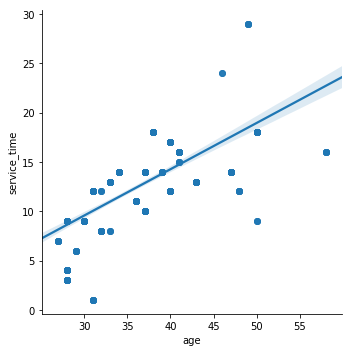

In [12]:
# From the above heatmap we can obeserve the strong correlated atributes
# Positive : [age,service_time] , [body_mass_index,service_time], [body_mas_index, age], [pet, transportation_expense]
# Negative : [hit_target, month_of_absense], [pet, service_time], [disciplinary_failure, reason_for_absense]
# Plotting the above attributes

sns.lmplot(x='age', y='service_time', data=df, fit_reg=True)


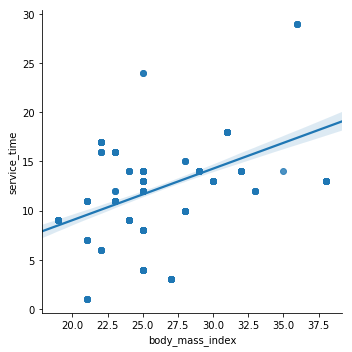

In [13]:

sns.lmplot(x='body_mass_index', y='service_time', data=df, fit_reg=True)


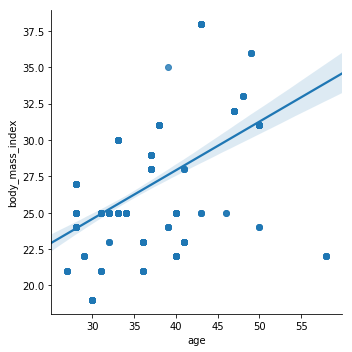

In [14]:
sns.lmplot(x='age', y='body_mass_index', data=df, fit_reg=True)


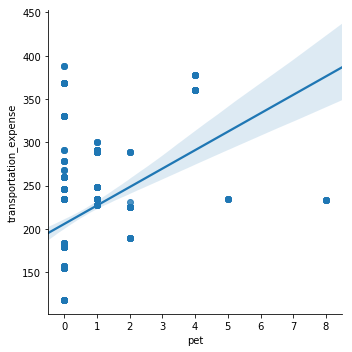

In [15]:
sns.lmplot(x='pet', y='transportation_expense', data=df, fit_reg=True)


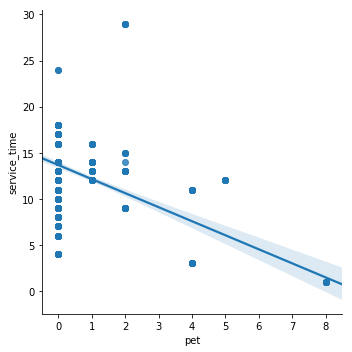

In [16]:
sns.lmplot(x='pet', y='service_time', data=df, fit_reg=True)

In [68]:
df = df.loc[:,((df.corr().absenteeism_time_in_hours.sort_values() > 0.1) | (df.corr().absenteeism_time_in_hours.sort_values() < -0.1))]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 709 entries, 0 to 708
Data columns (total 20 columns):
id                           709 non-null int64
transportation_expense       709 non-null int64
work_load_average/day        709 non-null float64
disciplinary_failure         709 non-null int64
son                          709 non-null int64
social_drinker               709 non-null int64
absenteeism_time_in_hours    709 non-null int64
season_3                     709 non-null uint8
reason_for_absence_0         709 non-null uint8
reason_for_absence_1         709 non-null uint8
reason_for_absence_2         709 non-null uint8
reason_for_absence_10        709 non-null uint8
reason_for_absence_12        709 non-null uint8
reason_for_absence_13        709 non-null uint8
reason_for_absence_19        709 non-null uint8
reason_for_absence_22        709 non-null uint8
reason_for_absence_23        709 non-null uint8
reason_for_absence_26        709 non-null uint8
reason_for_absence_27        

In [61]:
Y = df[['absenteeism_time_in_hours']]
X = df.drop(['absenteeism_time_in_hours', 'id'], axis=1)

In [62]:
# Min Max Scaler is used after an heuristic approach. It was choosen as it exhibited higher accuracy than it's counter parts.

# Feature Scaling
#x = X.values
#min_max_scaler = preprocessing.MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(x)
#X = pd.DataFrame(x_scaled,columns=list(X.columns))

X.describe()

,transportation_expense,work_load_average/day,disciplinary_failure,son,social_drinker,season_3,reason_for_absence_0,reason_for_absence_1,reason_for_absence_2,reason_for_absence_10,reason_for_absence_12,reason_for_absence_13,reason_for_absence_19,reason_for_absence_22,reason_for_absence_23,reason_for_absence_26,reason_for_absence_27,reason_for_absence_28
count,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000
mean,221.629055,271.367897,0.056417,1.000000,0.561354,0.246827,0.056417,0.021157,0.001410,0.032440,0.009873,0.067701,0.045134,0.053597,0.210155,0.046544,0.097320,0.157969
std,66.590466,39.035220,0.230889,1.096991,0.496572,0.431469,0.230889,0.144008,0.037556,0.177291,0.098941,0.251409,0.207745,0.225379,0.407706,0.210810,0.296602,0.364969
min,118.000000,205.917000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,179.000000,244.387000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,225.000000,264.249000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,260.000000,284.853000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,388.000000,378.884000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [63]:
# Splitting data into train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.3)
print( "\nX_train:\n")
print( X_train.shape)
X_train.head()


X_train:

(496, 18)


,transportation_expense,work_load_average/day,disciplinary_failure,son,social_drinker,season_3,reason_for_absence_0,reason_for_absence_1,reason_for_absence_2,reason_for_absence_10,reason_for_absence_12,reason_for_absence_13,reason_for_absence_19,reason_for_absence_22,reason_for_absence_23,reason_for_absence_26,reason_for_absence_27,reason_for_absence_28
133,155,302.585,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1
171,279,343.253,0,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0
335,179,236.629,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
459,279,230.290,0,2,1,0,0,0,0,0,0,0,0,0,1,0,0,0
404,260,239.409,0,4,1,1,0,0,0,0,0,0,0,0,0,0,0,1


In [64]:
print( "\nX_test:\n")
print( X_test.shape)
X_test.head()


X_test:

(213, 18)


,transportation_expense,work_load_average/day,disciplinary_failure,son,social_drinker,season_3,reason_for_absence_0,reason_for_absence_1,reason_for_absence_2,reason_for_absence_10,reason_for_absence_12,reason_for_absence_13,reason_for_absence_19,reason_for_absence_22,reason_for_absence_23,reason_for_absence_26,reason_for_absence_27,reason_for_absence_28
668,291,237.656,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0
75,361,253.465,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0
286,289,265.017,0,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0
662,118,237.656,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
460,179,249.797,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [65]:
lr = LinearRegression(normalize=True)
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [66]:
Y_pred = lr.predict(X_test)

RMSE = np.sqrt(mean_squared_error(Y_pred, Y_test))
print(RMSE)

3.8579373890061266


In [ ]:
lr.